# Exercise 8: Models of Segregation 

Mesut Cylan (18-748-012), Syed Shahvaiz Ahmed (18-756-635)

MOEC0559 Agent-based modeling for Business, Economics, Informatics and Social Science
Faculty of Business, Economics and Informatics

16.05.2019

# Modules

In [1]:
import matplotlib.pyplot as plt
import itertools
import random
import copy

# Spatial Proximity Model

In [20]:
class Schelling:
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races = 2):
        self.width = width 
        self.height = height 
        self.races = races
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.empty_houses = []
        self.agents = {}
 
    def populate(self):
        self.all_houses = list(itertools.product(range(self.width),range(self.height)))
        random.shuffle(self.all_houses)
 
        self.n_empty = int( self.empty_ratio * len(self.all_houses) )
        self.empty_houses = self.all_houses[:self.n_empty]
 
        self.remaining_houses = self.all_houses[self.n_empty:]
        houses_by_race = [self.remaining_houses[i::self.races] for i in range(self.races)]
        for i in range(self.races):
            #create agents for each race
            self.agents = dict(
                            list(self.agents.items()) +
                            list(dict(zip(houses_by_race[i], [i+1]*len(houses_by_race[i]))).items())
                        )
 
    def is_unsatisfied(self, x, y):
        race = self.agents[(x,y)]
        count_similar = 0
        count_different = 0

        if x > 0 and y > 0 and (x-1, y-1) not in self.empty_houses:
            if self.agents[(x-1, y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if y > 0 and (x,y-1) not in self.empty_houses:
            if self.agents[(x,y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x < (self.width-1) and y > 0 and (x+1,y-1) not in self.empty_houses:
            if self.agents[(x+1,y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and (x-1,y) not in self.empty_houses:
            if self.agents[(x-1,y)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x < (self.width-1) and (x+1,y) not in self.empty_houses:
            if self.agents[(x+1,y)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and y < (self.height-1) and (x-1,y+1) not in self.empty_houses:
            if self.agents[(x-1,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x > 0 and y < (self.height-1) and (x,y+1) not in self.empty_houses:
            if self.agents[(x,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x < (self.width-1) and y < (self.height-1) and (x+1,y+1) not in self.empty_houses:
            if self.agents[(x+1,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1

        if (count_similar+count_different) == 0:
            return False
        else:
            return float(count_similar)/(count_similar+count_different) < self.similarity_threshold
 
    def update(self):        
        for i in range(self.n_iterations):
            self.old_agents = copy.deepcopy(self.agents)
            n_changes = 0
            for agent in self.old_agents:
                if self.is_unsatisfied(agent[0], agent[1]):
                    agent_race = self.agents[agent]
                    empty_house = random.choice(self.empty_houses)
                    self.agents[empty_house] = agent_race
                    del self.agents[agent]
                    self.empty_houses.remove(empty_house)
                    self.empty_houses.append(agent)
                    n_changes += 1
            print (n_changes)
            if n_changes == 0:
                break
         
    def move_to_empty(self, x, y):
        race = self.agents[(x,y)]
        empty_house = random.choice(self.empty_houses)
        self.updated_agents[empty_house] = race
        del self.updated_agents[(x, y)]
        self.empty_houses.remove(empty_house)
        self.empty_houses.append((x, y))
        
    def calculate_similarity(self):
        similarity = []
        for agent in self.agents:
            count_similar = 0
            count_different = 0
            x = agent[0]
            y = agent[1]
            race = self.agents[(x,y)]
            if x > 0 and y > 0 and (x-1, y-1) not in self.empty_houses:
                if self.agents[(x-1, y-1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if y > 0 and (x,y-1) not in self.empty_houses:
                if self.agents[(x,y-1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if x < (self.width-1) and y > 0 and (x+1,y-1) not in self.empty_houses:
                if self.agents[(x+1,y-1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if x > 0 and (x-1,y) not in self.empty_houses:
                if self.agents[(x-1,y)] == race:
                    count_similar += 1
                else:
                    count_different += 1        
            if x < (self.width-1) and (x+1,y) not in self.empty_houses:
                if self.agents[(x+1,y)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if x > 0 and y < (self.height-1) and (x-1,y+1) not in self.empty_houses:
                if self.agents[(x-1,y+1)] == race:
                    count_similar += 1
                else:
                    count_different += 1        
            if x > 0 and y < (self.height-1) and (x,y+1) not in self.empty_houses:
                if self.agents[(x,y+1)] == race:
                    count_similar += 1
                else:
                    count_different += 1        
            if x < (self.width-1) and y < (self.height-1) and (x+1,y+1) not in self.empty_houses:
                if self.agents[(x+1,y+1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            try:
                similarity.append(float(count_similar)/(count_similar+count_different))
            except:
                similarity.append(1)
        return sum(similarity)/len(similarity)
    

54
13
4
2
0
122
46
23
14
14
4
2
1
2
2
4
1
0
177
72
44
26
15
14
7
6
2
1
1
0
248
119
67
50
36
27
16
11
10
8
6
4
1
1
0
364
232
155
102
76
57
47
38
30
19
27
22
11
5
6
6
2
2
1
1
2
0
469
381
312
280
254
212
186
159
132
113
98
69
54
58
48
46
37
28
28
33
22
24
20
16
15
11
12
11
8
10
7
6
2
1
1
0
554
519
484
475
447
448
462
455
473
475
461
450
441
439
435
435
411
392
366
364
392
394
412
443
423
395
400
363
340
347
342
359
381
369
396
388
385
378
384
404
391
375
374
387
391
341
364
358
374
380
362
362
318
307
332
292
299
316
338
368
352
357
347
343
294
297
341
319
316
312
345
358
368
340
333
353
363
366
363
387
394
332
317
339
353
370
361
349
371
374
380
387
405
407
442
464
424
415
434
418
406
388
398
404
366
355
405
406
411
395
418
430
423
415
434
448
425
429
398
397
419
436
403
402
398
416
455
425
444
485
454
452
454
424
431
444
448
452
451
430
414
432
438
450
452
442
436
409
443
456
423
409
380
372
351
379
353
384
416
409
417
432
410
396
406
410
393
405
369
379
402
406
418
386
376
339
346
360


457
434
450
435
438
448
440
400
384
366
412
435
416
423
418
402
386
408
415
413
404
433
433
415
437
413
459
423
427
416
415
445
451
446
428
434
416
431
454
432
446
449
427
450
456
441
428
441
411
410
396
372
398
411
401
346
371
333
312
333
346
341
354
363
374
374
350
394
393
380
346
344
321
348
354
371
347
359
352
330
348
354
350
348
323
328
373
356
344
339
342
363
388
370
351
348
349
339
307
293
294
295
316
360
350
345
326
288
285
306
314
303
288
292
338
357
384
393
392
371
357
401
380
375
381
378
382
408
432
423
424
453
446
426
440
458
447
453
450
407
397
417
433
438
406
390
371
393
393
390
393
400
363
370
387
383
409
420
431
425
440
397
391
410
405
418
413
448
453
457
447
445
436
433
467
437
411
415
399
414
425
427
408
393
390
442
442
438
419
399
385
340
357
381
381
365
370
391
387
358
378
376
369
341
385
372
357
375
380
383
386
412
403
375
352
335
340
334
344
342
334
331
299
290
333
364
361
344
352
331
342
331
331
318
345
361
378
362
358
358
373
349
355
386
381
380
387
406
393
404


593
574
587
587
588
598
591
577
573
573
567
573
574
589
589
597
585
602
593
566
586
596
593
589
583
592
594
598
588
586
592
595
594
566
580
576
592
592
592
583
591
586
591
597
599
596
591
592
599
583
587
584
593
578
585
592
592
594
579
576
589
592
608
606
595
590
598
587
583
588
589
600
595
591
594
594
588
589
584
581
590
601
590
580
591
598
593
594
572
567
576
586
592
587
596
590
596
598
603
592
588
586
586
592
585
596
589
601
583
594
598
590
590
593
593
590
598
595
587
579
578
583
604
584
591
591
603
603
605
600
596
587
589
591
580
583
591
587
575
598
600
577
586
589
594
602
601
588
574
576
584
589
584
591
587
587
587
581
604
583
584
587
567
581
589
572
580
568
588
581
586
583
602
604
601
586
579
583
576
584
588
581
579
586
581
585
598
584
579
585
588
567
599
591
593
578
570
573
600
588
595
602
597
598
592
580
589
568
579
590
581
577
605
599
594
583
588
589
574
578
576
585
574
585
570
574
589
588
577
569
595
600
596
590
568
578
593
599
590
581
599
589
594
589
578
590
583
585
581
576


585
574
565
575
575
589
585
598
584
575
577
563
579
580
578
583
596
588
568
578
574
568
566
554
564
590
592
586
588
587
585
594
578
586
589
572
574
588
583
596
606
596
574
581
583
584
579
584
592
593
581
583
589
585
599
573
590
593
567
554
577
584
592
574
570
575
590
587
594
581
571
592
592
582
573
567
598
586
598
596
595
600
602
604
586
598
590
602
598
587
585
590
580
592
586
592
595
595
589
594
579
578
598
582
581
572
581
583
594
592
589
594
583
586
583
590
598
580
576
575
577
584
575
571
555
585
587
594
591
578
574
584
591
587
601
590
587
580
578
582
584
591
587
581
582
592
590
590
585
579
585
598
596
599
586
582
598
592
584
601
582
583
578
586
582
580
600
583
598
595
595
587
583
589
590
586
592
576
592
594
581
584
594
604
595
582
581
590
585
584
590
589
582
587
584
592
590
595
597
600
588
588
601
602
596
590
590
590
576
589
596
586
586
592
596
575
566
590
590
595
601
600
593
593
584
596
592
582
600
585
592
591
593
593
590
595
598
583
579
590
578
588
575
574
578
578
586
594
585
595


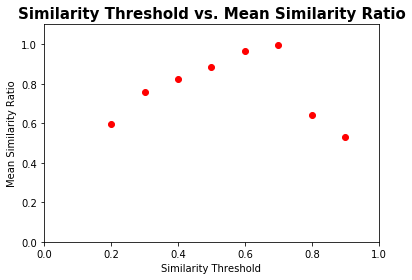

In [23]:
similarity_threshold_ratio = {}
for i in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    schelling = Schelling(30, 30, 0.3, i, 4000, 2)
    schelling.populate()
    schelling.update()
    similarity_threshold_ratio[i] = schelling.calculate_similarity()
 
fig, ax = plt.subplots()
plt.plot(similarity_threshold_ratio.keys(), similarity_threshold_ratio.values(), '-o')
ax.set_title('Similarity Threshold vs. Mean Similarity Ratio', fontsize=15, fontweight='bold')
ax.set_xlim([0.2, 0.9])
ax.set_ylim([0, 1.1])
ax.set_xlabel("Similarity Threshold")
ax.set_ylabel("Mean Similarity Ratio")
plt.savefig('schelling_segregation_measure.png')